In [1]:
from scipy.io import loadmat, savemat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = loadmat('/Volumes/Lab/Users/praful/multielectrode/scripts/python_scripts/active_learning-2020-10-06-7-n244-p1-r100.mat')

In [3]:
performance_stack, performance_stack_random, num_samples_stack = data['performance_stack'], data['performance_stack_random'], data['num_samples_stack']

In [4]:
mean_performance = np.mean(performance_stack, axis=0)

In [5]:
cutoff_ind = np.absolute(mean_performance - (mean_performance[0] - (mean_performance[0] - mean_performance[-1]) * 0.85)).argmin()

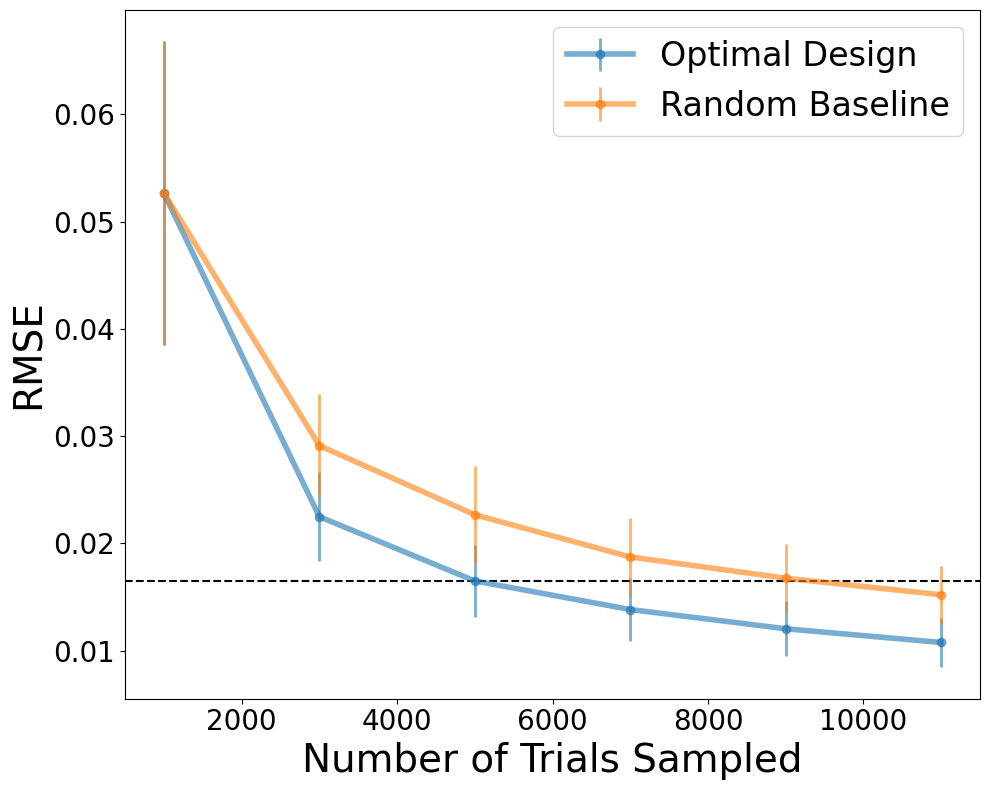

In [6]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))
#plt.figure(figsize=(10, 8))
ax.errorbar(np.mean(np.array(num_samples_stack), axis=0), np.mean(np.array(performance_stack), 0), 
             yerr=np.std(np.array(performance_stack), axis=0), fmt='o', ls='-', linewidth=4, elinewidth=2, label='Optimal Design', c='tab:blue', alpha=0.6)
ax.errorbar(np.mean(np.array(num_samples_stack), axis=0), np.mean(np.array(performance_stack_random), 0), 
             yerr=np.std(np.array(performance_stack_random), axis=0), fmt='o', ls='-', linewidth=4, elinewidth=2, label='Random Baseline', c='tab:orange', alpha=0.6)

ax.axhline(mean_performance[cutoff_ind], linestyle='--', c='k')
ax.tick_params(labelsize=20)
ax.set_xlabel('Number of Trials Sampled', fontsize=28)
ax.set_ylabel('RMSE', fontsize=28)
ax.legend(fontsize=24)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.savefig('performances_5step_p1_n244_adamw_r100.png', dpi=300)

In [ ]:
amplitudes, t_final_stack, t_final_init_stack = data['X'], data['t_final_stack'], data['t_final_init_stack']

In [ ]:
t_final_init_avg = np.mean(t_final_init_stack, axis=0)

In [ ]:
t_final_avg = np.zeros(len(amplitudes))

for i in range(len(t_final_stack)):
    t_repeat = np.zeros(len(amplitudes))
    for j in range(len(t_final_stack[i])):
        t_repeat += np.exp(-(j+1)/len(t_final_stack[i])) * t_final_stack[i][j]
    
    t_final_avg += t_repeat

t_final_avg = t_final_avg / len(t_final_stack)

In [ ]:
t_all_avg = np.zeros(len(amplitudes))
cnt = 0
for i in range(len(t_final_init_stack)):
    cnt += 1
    t_all_avg += t_final_init_stack[i]

for i in range(len(t_final_stack)):
    for j in range(len(t_final_stack[i])):
        cnt +=1
        t_all_avg += t_final_stack[i][j]

t_all_avg = t_all_avg / cnt

In [ ]:
plt.figure()
plt.plot(t_all_avg)

In [ ]:
#savemat('pc_244_sampling_adamw.mat', {'amplitudes': amplitudes, 'trials': t_all_avg})

In [ ]:
X_plot_1d = np.linspace(-1.8, 1.8, 40)
X_plot = np.array(np.meshgrid(X_plot_1d, X_plot_1d, X_plot_1d)).T.reshape(-1,3)

In [ ]:
kde = KernelDensity(kernel="gaussian", bandwidth=0.1).fit(amplitudes, sample_weight=t_final_init_avg)

In [ ]:
log_dens = kde.score_samples(X_plot)

In [ ]:
density = np.exp(log_dens)

%matplotlib inline

fig = plt.figure()
fig.clear()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.view_init(elev=16., azim=-50)
fig.add_axes(ax)
plt.xlabel(r'$I_1$ ($\mu$A)', fontsize=16)
plt.ylabel(r'$I_2$ ($\mu$A)', fontsize=16)
plt.xlim(-1.8, 1.8)
plt.ylim(-1.8, 1.8)
ax.set_zlim(-1.8, 1.8)
ax.set_zlabel(r'$I_3$ ($\mu$A)', fontsize=16)

scat = ax.scatter(X_plot[:, 0], 
            X_plot[:, 1],
            X_plot[:, 2], marker='o', c=density, s=20, cmap=cm.jet)

plt.show()

In [ ]:
kde = KernelDensity(kernel="gaussian", bandwidth=0.1).fit(amplitudes, sample_weight=t_final_avg)

In [ ]:
log_dens = kde.score_samples(X_plot)

In [ ]:
density = np.exp(log_dens)

%matplotlib inline

fig = plt.figure()
fig.clear()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.view_init(elev=16., azim=-50)
fig.add_axes(ax)
plt.xlabel(r'$I_1$ ($\mu$A)', fontsize=16)
plt.ylabel(r'$I_2$ ($\mu$A)', fontsize=16)
plt.xlim(-1.8, 1.8)
plt.ylim(-1.8, 1.8)
ax.set_zlim(-1.8, 1.8)
ax.set_zlabel(r'$I_3$ ($\mu$A)', fontsize=16)

scat = ax.scatter(X_plot[:, 0], 
            X_plot[:, 1],
            X_plot[:, 2], marker='o', c=density, s=20, cmap=cm.jet)

plt.show()

In [ ]:
kde = KernelDensity(kernel="gaussian", bandwidth=0.1).fit(amplitudes, sample_weight=t_all_avg)

In [ ]:
log_dens = kde.score_samples(X_plot)

In [ ]:
density = np.exp(log_dens)

%matplotlib inline

fig = plt.figure()
fig.clear()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.view_init(elev=16., azim=-50)
fig.add_axes(ax)
plt.xlabel(r'$I_1$ ($\mu$A)', fontsize=16)
plt.ylabel(r'$I_2$ ($\mu$A)', fontsize=16)
plt.xlim(-1.8, 1.8)
plt.ylim(-1.8, 1.8)
ax.set_zlim(-1.8, 1.8)
ax.set_zlabel(r'$I_3$ ($\mu$A)', fontsize=16)

scat = ax.scatter(X_plot[:, 0], 
            X_plot[:, 1],
            X_plot[:, 2], marker='o', c=density, s=20, cmap=cm.jet)

plt.show()

In [ ]:
%matplotlib ipympl

fig = plt.figure()
fig.clear()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.view_init(elev=16., azim=-50)
fig.add_axes(ax)
plt.xlabel(r'$I_1$ ($\mu$A)', fontsize=16)
plt.ylabel(r'$I_2$ ($\mu$A)', fontsize=16)
plt.xlim(-1.8, 1.8)
plt.ylim(-1.8, 1.8)
ax.set_zlim(-1.8, 1.8)
ax.set_zlabel(r'$I_3$ ($\mu$A)', fontsize=16)

scat = ax.scatter(amplitudes[:, 0], 
            amplitudes[:, 1],
            amplitudes[:, 2], marker='o', c=t_final_init_avg, s=20, cmap=cm.jet)

plt.show()

In [ ]:
%matplotlib ipympl

fig = plt.figure()
fig.clear()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.view_init(elev=16., azim=-50)
fig.add_axes(ax)
plt.xlabel(r'$I_1$ ($\mu$A)', fontsize=16)
plt.ylabel(r'$I_2$ ($\mu$A)', fontsize=16)
plt.xlim(-1.8, 1.8)
plt.ylim(-1.8, 1.8)
ax.set_zlim(-1.8, 1.8)
ax.set_zlabel(r'$I_3$ ($\mu$A)', fontsize=16)

scat = ax.scatter(amplitudes[:, 0], 
            amplitudes[:, 1],
            amplitudes[:, 2], marker='o', c=t_final_avg, s=20, cmap=cm.jet)

plt.show()

In [ ]:
%matplotlib ipympl

fig = plt.figure()
fig.clear()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.view_init(elev=16., azim=-50)
fig.add_axes(ax)
plt.xlabel(r'$I_1$ ($\mu$A)', fontsize=16)
plt.ylabel(r'$I_2$ ($\mu$A)', fontsize=16)
plt.xlim(-1.8, 1.8)
plt.ylim(-1.8, 1.8)
ax.set_zlim(-1.8, 1.8)
ax.set_zlabel(r'$I_3$ ($\mu$A)', fontsize=16)

scat = ax.scatter(amplitudes[:, 0], 
            amplitudes[:, 1],
            amplitudes[:, 2], marker='o', c=t_all_avg, s=20, cmap=cm.jet)

plt.show()